In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [18]:
image = cv2.imread('Photos/building.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)
edges_image = cv2.Canny(blurred, 50, 120)

In [7]:
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            cv2.line(img, (x1, y1), (x2, y2), color, thickness)


def weighted_img(img, initial_img, alpha=0.8, beta=1., lamda=0.):
    return cv2.addWeighted(initial_img, alpha, img, beta, lamda)

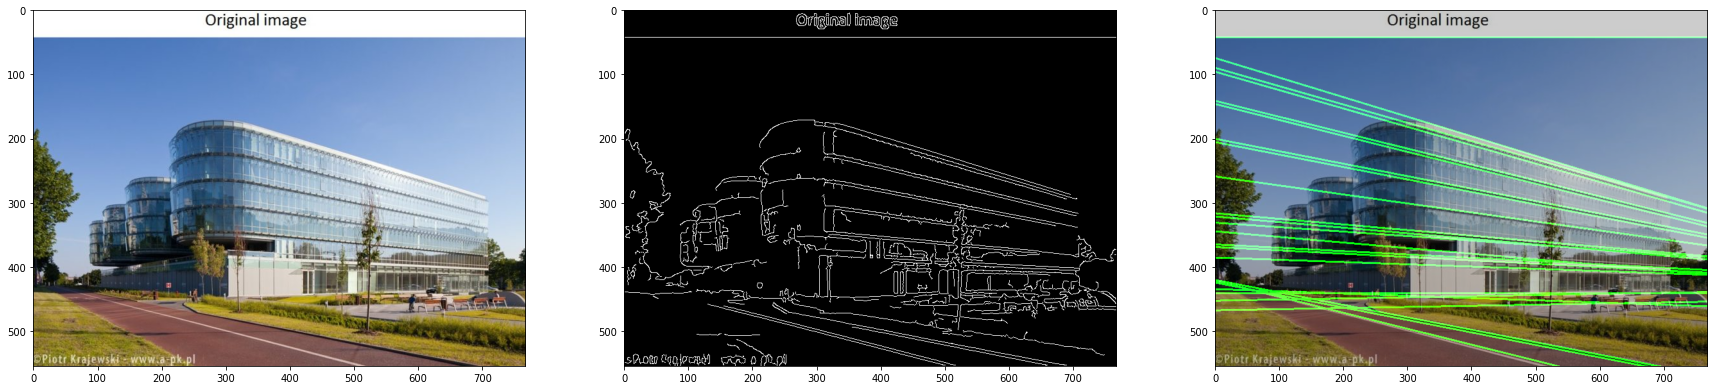

In [22]:
# Hough Transform
# Specific explanation for better understanding
# https://homepages.inf.ed.ac.uk/amos/hough.html
# https://tomaszkacmajor.pl/index.php/2017/06/05/hough-lines-transform-explained/

rho_resolution = 1 # 1 pixel and 1 degree respectively
theta_resolution = np.pi / 180
threshold = 150 # if threshold is lower, more lines will be found and vice versa.

hough_lines = cv2.HoughLines(edges_image, rho_resolution, theta_resolution, threshold)

hough_lines = cv2.HoughLines(edges_image, rho_resolution, theta_resolution, threshold)

hough_lines_image = np.zeros_like(image)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image, image)

plt.figure(figsize=(30, 20))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(edges_image, cmap='gray')
plt.subplot(133)
plt.imshow(original_image_with_hough_lines, cmap='gray')
plt.show()